In [4]:
import os
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import DecomposeResult

In [3]:
register_matplotlib_converters()
sns.set_style("darkgrid")

In [5]:
inputPath = r"X:\georisk\HaRIA_B_Wind\data\raw\from_bom\2019\Daily"
outputPath = r"X:\georisk\HaRIA_B_Wind\data\derived\obs\daily_max_wind\wind\gpd_iterative"
stationfile = os.path.join(inputPath,'DC02D_StnDet_999999999632559_updated.txt')
stndf = pd.read_csv(stationfile)

In [53]:
stn=stndf.loc[1757]
stnnum = stn['Bureau of Meteorology Station Number']
stnname = stn['Station Name'].strip()
print(f"Processing {stnname} ({stnnum})")

Processing WILLIS ISLAND (200283)


In [7]:
def loadData(inputPath, stnnum):
    """
    Load data from a csv file. Remove all records where the quality flag is not 'Y', and any missing values.

    :param str inputPath: Directory where observation data files are stored
    :param int stnnum: BoM Station Number

    :returns: `np.array` of gust wind speed values.

    """
    fname = f"DC02D_Data_{stnnum:06d}_999999999632559.txt"
    df = pd.read_csv(os.path.join(inputPath, fname), skipinitialspace=True)
    gust = df[df['Quality of maximum gust speed']=='Y']['Speed of maximum wind gust in m/s'].dropna().values

    return gust

In [54]:
fname = f"DC02D_Data_{stnnum:06d}_999999999632559.txt"
gust = loadData(inputPath, stnnum)
df = pd.read_csv(os.path.join(inputPath, fname), skipinitialspace=True, parse_dates={'Date': ['Year', 'Month', 'Day']})
df.set_index('Date', inplace=True)
df.dropna(subset=['Speed of maximum wind gust in m/s'], inplace=True)

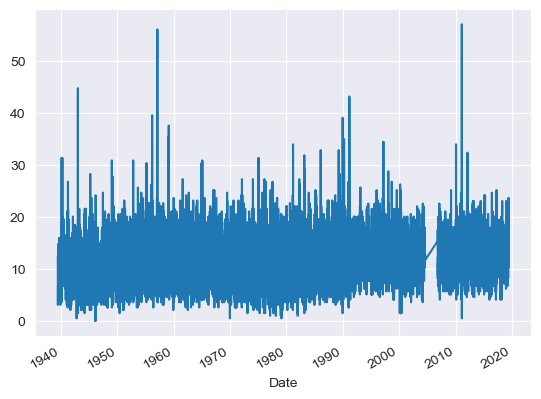

In [55]:
df['Speed of maximum wind gust in m/s'].plot()

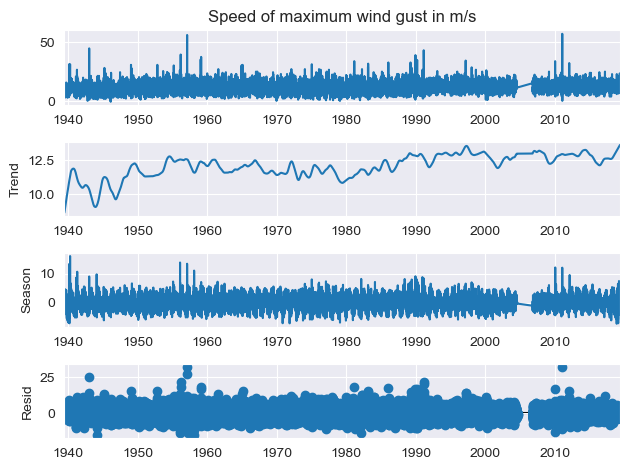

In [56]:
stl = STL(df['Speed of maximum wind gust in m/s'], period=365)
res=stl.fit()
fig = res.plot()

In [57]:
import scipy.stats as stats
p = stats.lognorm.fit(res.resid)
pn = stats.norm.fit(res.resid)

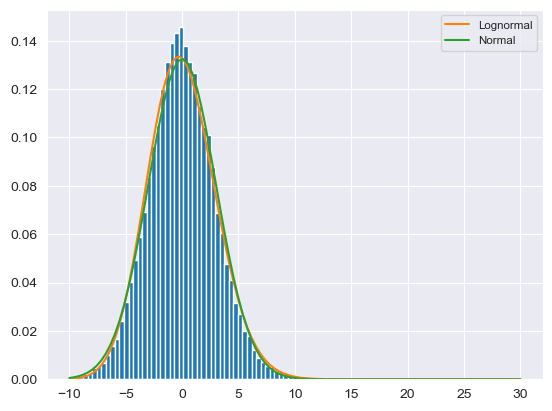

In [58]:
x = np.linspace(-10, 30, 100)
plt.hist(res.resid, bins=x, density=True)
plt.plot(x, stats.lognorm.pdf(x, *p), label="Lognormal")
plt.plot(x, stats.norm.pdf(x, *pn), label="Normal")
plt.legend(fontsize='small')